In [1]:
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping , ModelCheckpoint
from keras.models import load_model
from keras.optimizers import adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
X_train = pd.read_csv("Train/x_train.csv").values
y_train = pd.read_csv("Train/y_train.csv").values

In [3]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
y_train = sc.transform(y_train)

In [4]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))

In [5]:
X_train.shape

(1257, 1, 1)

In [6]:
# y_train = y_train.reshape(-1,)

In [7]:
y_train.shape

(1257, 1)

In [8]:
XT = X_train[:1000]
YT = y_train[:1000]
Xt = X_train[1000:]
Yt = y_train[1000:]

In [9]:
print(XT.shape)
print(Xt.shape)
print(YT.shape)
print(Yt.shape)

(1000, 1, 1)
(257, 1, 1)
(1000, 1)
(257, 1)


In [10]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 32, return_sequences = True, input_shape = (None, 1)))

# # Adding a second LSTM layer
# regressor.add(LSTM(units = 32, return_sequences = True))

# # Adding a third LSTM layer
# regressor.add(LSTM(units = 16, return_sequences = True))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 3))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = adam(lr=0.0007), loss = 'mean_squared_error', metrics= ['accuracy'])

regressor.summary()

W0811 03:13:26.658109 140100236040000 deprecation_wrapper.py:119] From /home/shubham/.conda/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 03:13:26.981671 140100236040000 deprecation_wrapper.py:119] From /home/shubham/.conda/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 03:13:27.007768 140100236040000 deprecation_wrapper.py:119] From /home/shubham/.conda/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 03:13:28.717770 140100236040000 deprecation_wrapper.py:119] From /home/shubham/.conda/envs/my_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.comp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 32)          4352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 3)                 432       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 4,788
Trainable params: 4,788
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fitting the RNN to the Training set
hist = regressor.fit(XT,YT, epochs = 50, batch_size = 32, validation_data=(Xt,Yt))

W0811 03:13:37.719015 140100236040000 deprecation.py:323] From /home/shubham/.conda/envs/my_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 03:13:39.282348 140100236040000 deprecation_wrapper.py:119] From /home/shubham/.conda/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0811 03:13:39.448710 140100236040000 deprecation_wrapper.py:119] From /home/shubham/.conda/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1000 samples, validate on 257 samples
Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1767 - acc: 1.0000e-03 - val_loss: 0.6735 - val_acc: 0.0000e+00
Epoch 2/50
1000/1000 [==============================] - 0s 175us/step - loss: 0.1421 - acc: 1.0000e-03 - val_loss: 0.5716 - val_acc: 0.0000e+00
Epoch 3/50
1000/1000 [==============================] - 0s 186us/step - loss: 0.1072 - acc: 1.0000e-03 - val_loss: 0.4550 - val_acc: 0.0000e+00
Epoch 4/50
1000/1000 [==============================] - 0s 194us/step - loss: 0.0739 - acc: 1.0000e-03 - val_loss: 0.3280 - val_acc: 0.0000e+00
Epoch 5/50
1000/1000 [==============================] - 0s 163us/step - loss: 0.0465 - acc: 1.0000e-03 - val_loss: 0.2125 - val_acc: 0.0000e+00
Epoch 6/50
1000/1000 [==============================] - 0s 176us/step - loss: 0.0320 - acc: 1.0000e-03 - val_loss: 0.1366 - val_acc: 0.0039
Epoch 7/50
1000/1000 [==============================] - 0s 155us/step - loss: 0.0271 - acc: 1.0

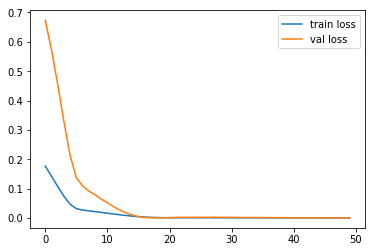

In [12]:
plt.plot(hist.history['loss'], label = "train loss")
plt.plot(hist.history['val_loss'], label ="val loss")
plt.legend()
plt.show()

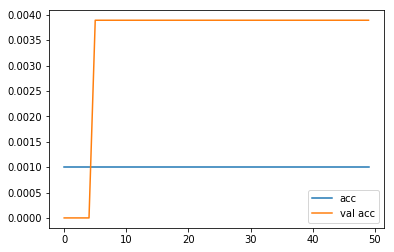

In [13]:
plt.plot(hist.history['acc'], label="acc")
plt.plot(hist.history['val_acc'], label="val acc")
plt.legend()
plt.show()

In [14]:
y_pred = regressor.predict(Xt)

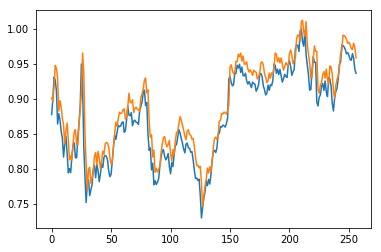

In [15]:
plt.plot(Yt)
plt.plot(y_pred)
plt.show()

In [16]:
# np.arange(1000,1257).shape
# y_pred.shape

In [17]:
# modelcheckpoint = ModelCheckpoint("best_model.h5",save_best_only=True)
# earlystop = EarlyStopping(patience=5 , monitor='val_loss',restore_best_weights=True)

# hist = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[modelcheckpoint,earlystop], shuffle=True, validation_split=0.2)

## With Test Set

In [18]:
X_test = pd.read_csv("Test/x_test.csv").values

In [19]:
sc1 = MinMaxScaler(feature_range = (0, 1))

In [20]:
X_test = sc1.fit_transform(X_test)

In [21]:
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [22]:
X_test.shape

(19, 1, 1)

In [23]:
y_pred = regressor.predict(X_test)


In [24]:
y_pred = sc1.inverse_transform(y_pred)

In [25]:
result = pd.DataFrame(y_pred, columns=['High'])

In [26]:
result.head()

,High
0,791.410400
1,792.597839
2,794.961121
3,807.361023
4,809.517822


In [27]:
result.to_csv("pred_updated.csv", index=False)

# 40 Time Step LSTM

In [28]:
new_data = pd.read_csv("Train/x_train.csv")
test_data = pd.read_csv("Test/x_test.csv")

In [29]:
new_data = pd.concat((new_data,test_data), axis=0)

In [30]:
new_data.shape

(1276, 1)

In [31]:
dataset = new_data.values

In [32]:
dataset.shape

(1276, 1)

In [33]:

train = dataset[0:1257,:]
valid = dataset[1257:,:]

In [34]:
valid.shape

(19, 1)

In [35]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [36]:
x_train, y_train = [], []
for i in range(40,len(train)):
    x_train.append(scaled_data[i-40:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
print(x_train.shape)
print(y_train.shape)

(1217, 40)
(1217,)


In [38]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1217, 40, 1)


In [39]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)

Epoch 1/1
1217/1217 [==============================] - 49s 40ms/step - loss: 0.0028


In [40]:
valid.shape

(19, 1)

In [41]:

#predicting 19 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 40:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [42]:
inputs.shape

(59, 1)

In [43]:
X_test = []
for i in range(40,inputs.shape[0]):
    X_test.append(inputs[i-40:i,0])
X_test = np.array(X_test)

In [44]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [45]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

21.647960299162623

/home/shubham/.conda/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


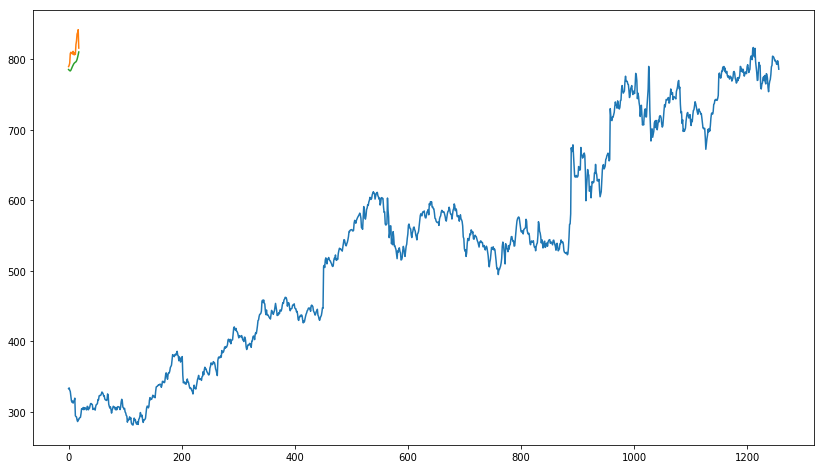

In [46]:
#for plotting
plt.figure(figsize=(14,8))
train = new_data[:1257]
valid = new_data[1257:]
valid['Predictions'] = closing_price
plt.plot(train['High'])
plt.plot(valid[['High','Predictions']])
plt.show()

In [47]:
closing_price.shape

(19, 1)

In [48]:
df=pd.DataFrame(closing_price)

In [49]:
df.columns= ['High']

In [50]:
df.to_csv("pred_new_40.csv", index=False)